In [1]:
run plotting.py

In [2]:
from gerrychain import Graph

In [3]:
g = Graph.from_json('ChainUtilityData/graph_dec.json')

In [4]:
for n in g.nodes:
    if g.nodes[n]['POP100'] != 0 and g.nodes[n]['G_REP'] == 0 and g.nodes[n]['G_DEM'] == 0 and g.nodes[n]['SEN_REP'] == 0 and g.nodes[n]['SEN_DEM']==0:
        print(n, g.nodes[n]['POP100'])
        

370 2.0
411 7.0
616 2.0
687 9.0
707 5.0
708 1.0
772 4.0
1337 4.0
1732 5.0
1779 2.0
2307 2.0
2636 7.0


In [5]:
g.nodes[1974]

{'boundary_node': False,
 'area': 321943.4995001122,
 'CountyID': 18,
 'VistaID': 'WVC071:02',
 'POP100': 998.0,
 'US_Distric': 3,
 'UT_SEN': 5,
 'UT_HOUSE': 34,
 'SEN_DEM': 96.72822527832352,
 'SEN_REP': 105.87819253438113,
 'G_DEM': 2.614276358873608,
 'G_REP': 0.0,
 'COMB_REP': 52.939096267190564,
 'COMB_DEM': 49.671250818598566}

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from shapely import geometry

In [7]:
data = pd.read_parquet('sample_data.parquet.gzip')
data.index = np.arange(len(data))

# Making Violin Plots

In [8]:
m = 4
vote_share_sen10 = pd.DataFrame(list(data.iloc[:, 21+2*m:21+3*m].values), columns=np.arange(1, m+1))

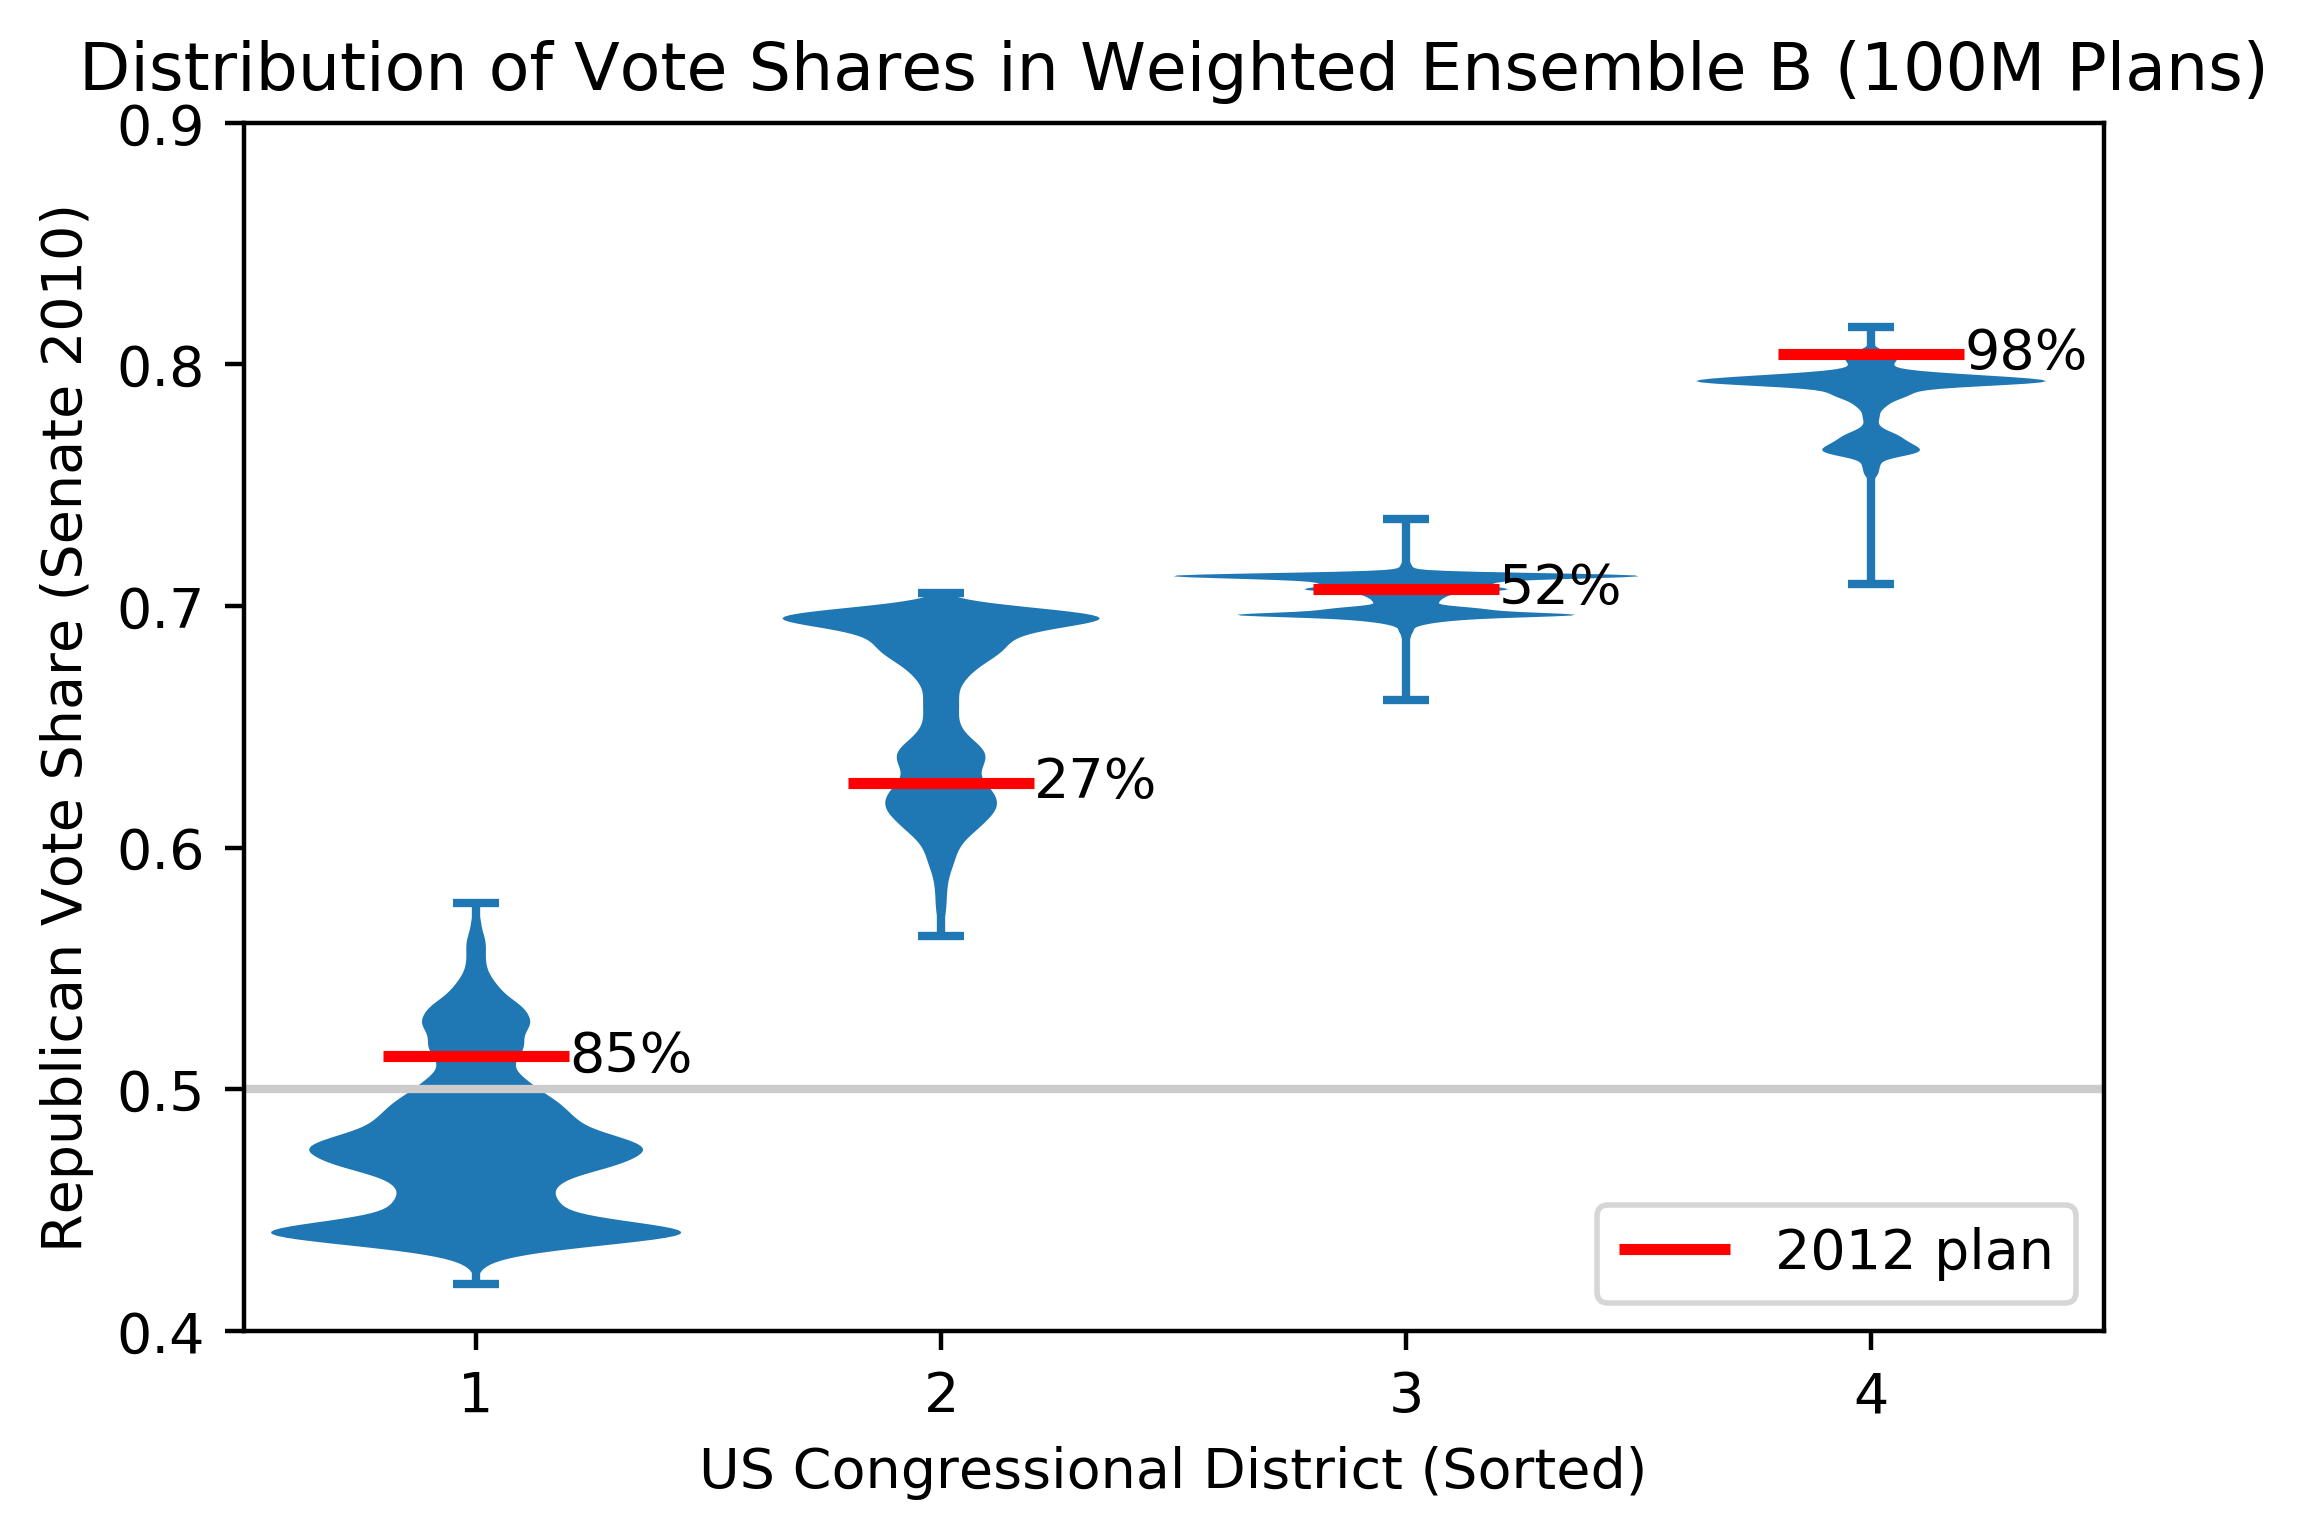

<Figure size 432x288 with 0 Axes>

In [9]:
%run plotting.py
make_violin_plot(vote_share_sen10, alpha=1, area_normalizer='L2', title='Distribution of Vote Shares in Weighted Ensemble B (100M Plans)', ylabel='Republican Vote Share (Senate 2010)', xlabel='US Congressional District (Sorted)', save=True, savetitle='TestPlots/violinL2_horiz.pdf', figsize=(6,4), dpi=400, vert=True, bw_method=0.1, widths=0.2, dist_height=1)

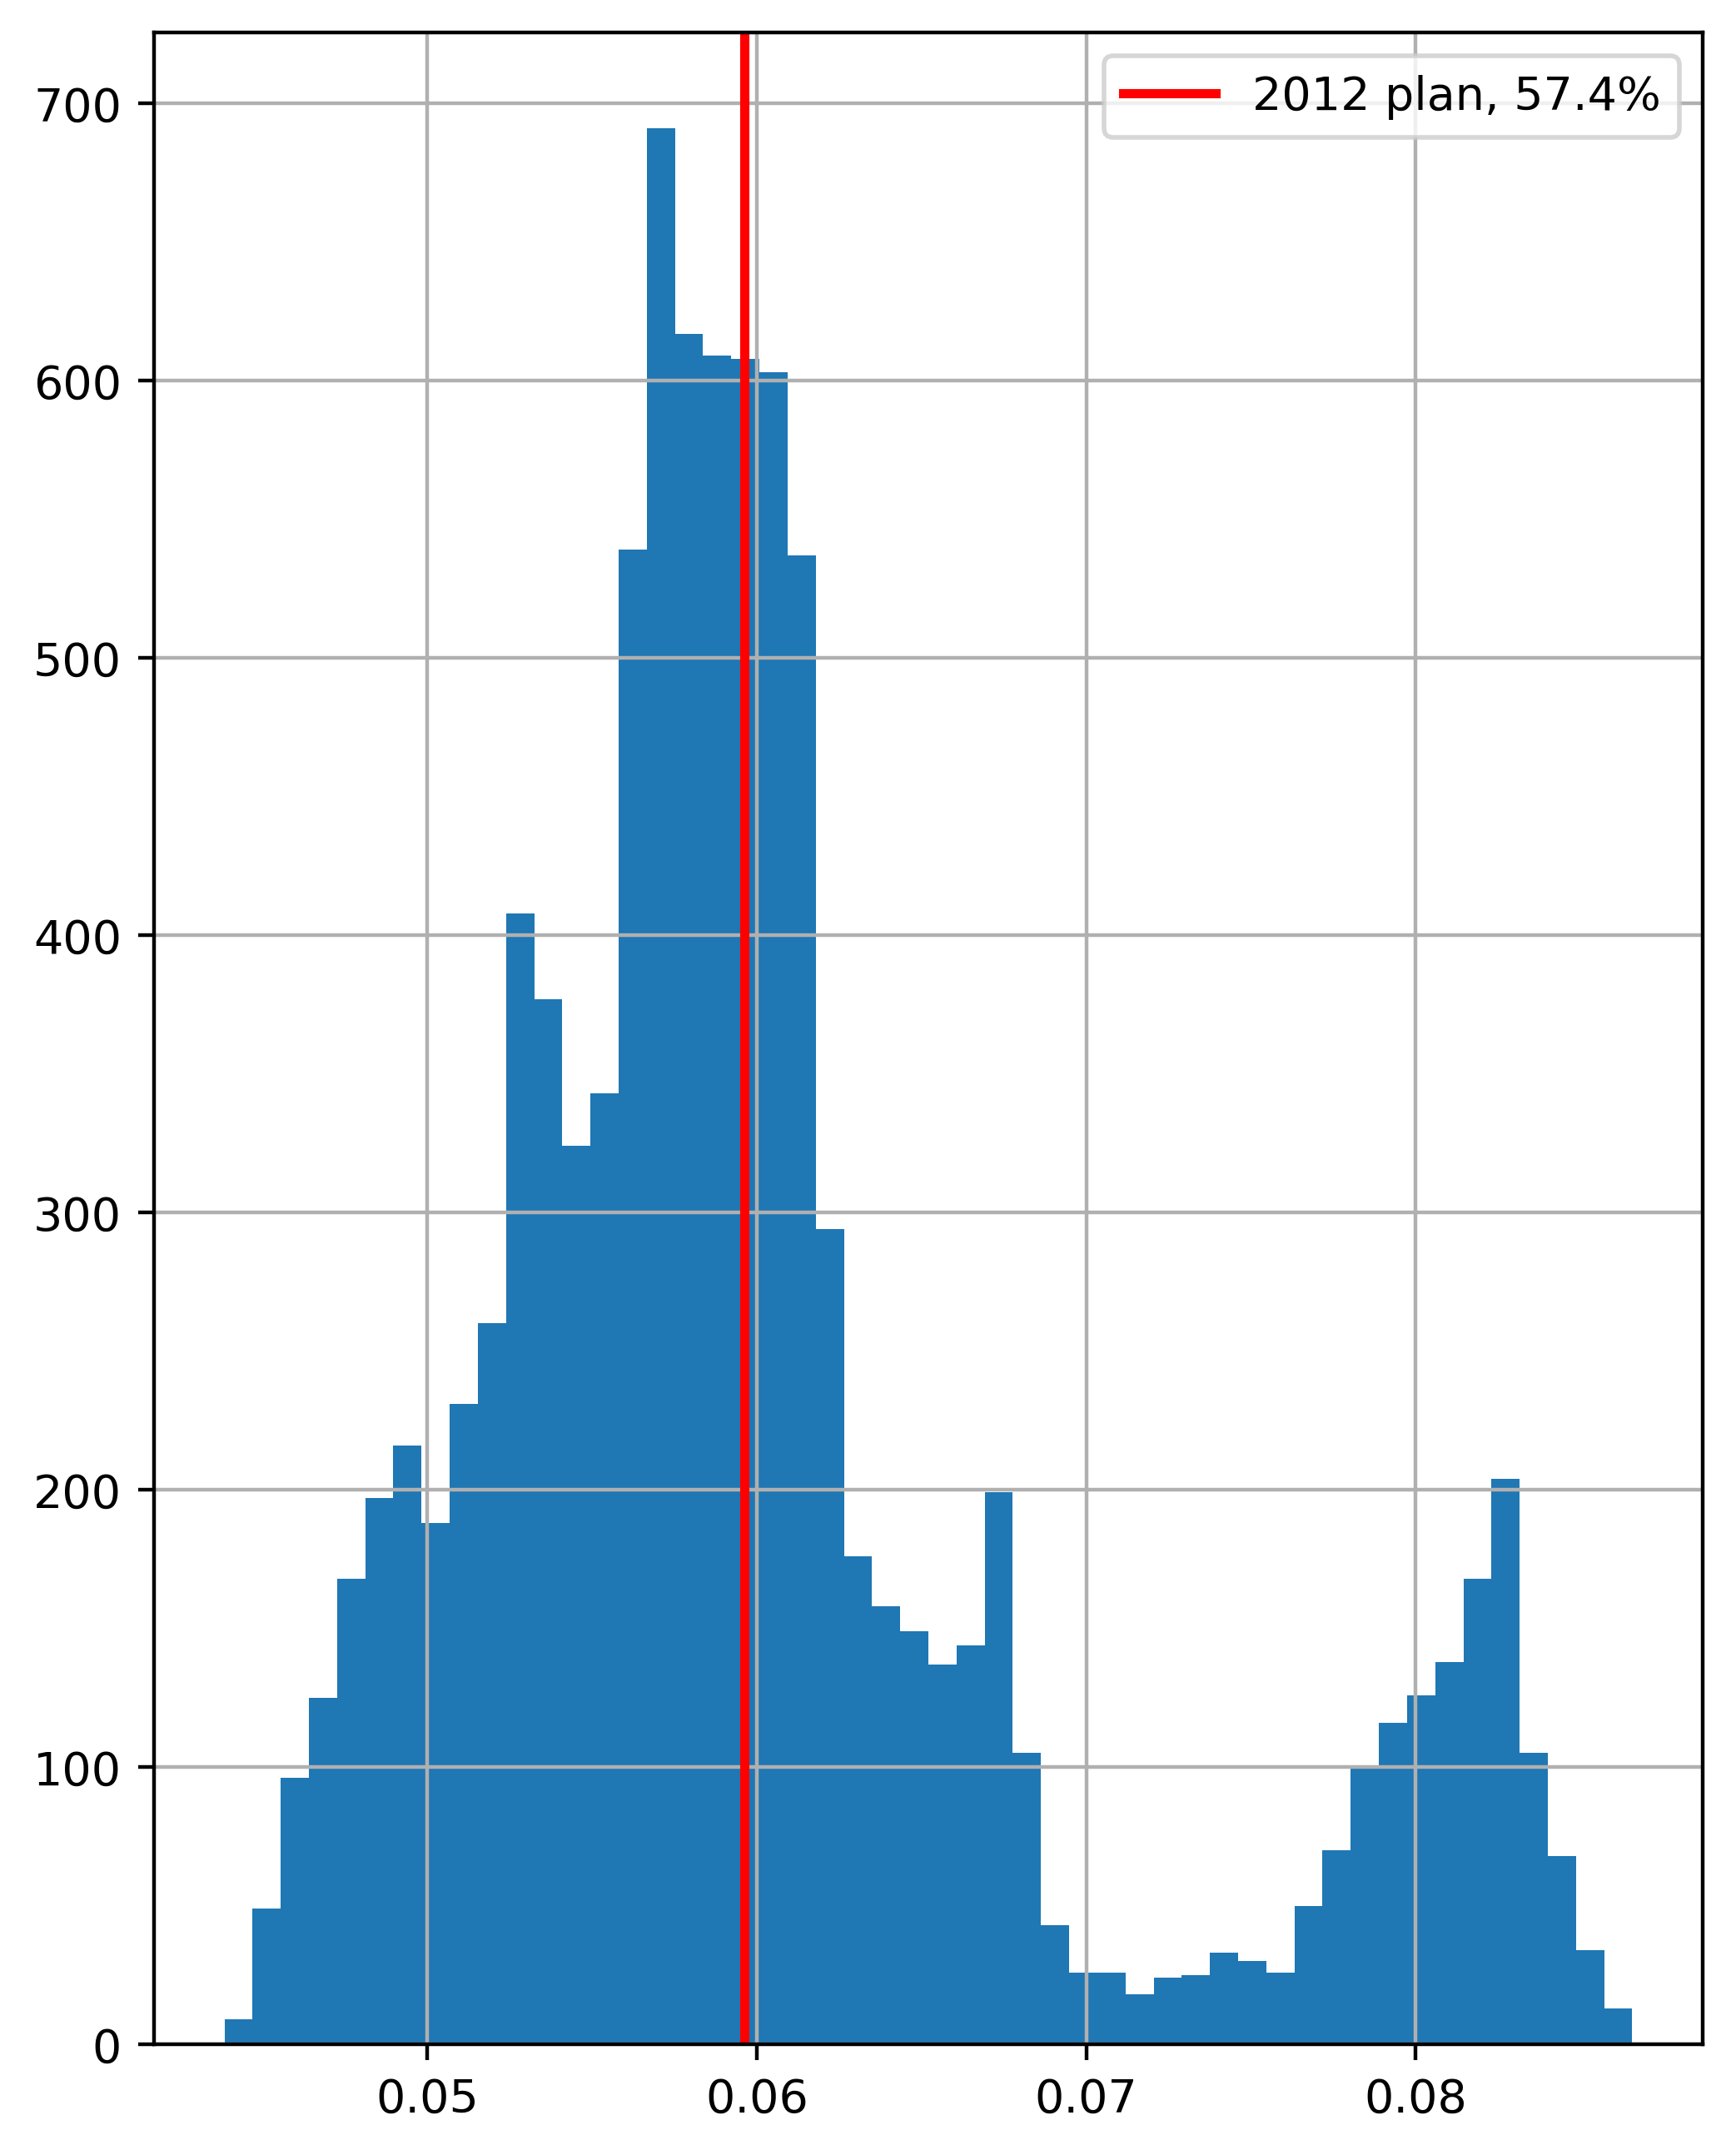

<Figure size 432x288 with 0 Axes>

In [10]:
key = 'Avg Abs Partisan Dislocation - SEN'
make_histogram(pd.Series(data[key]))

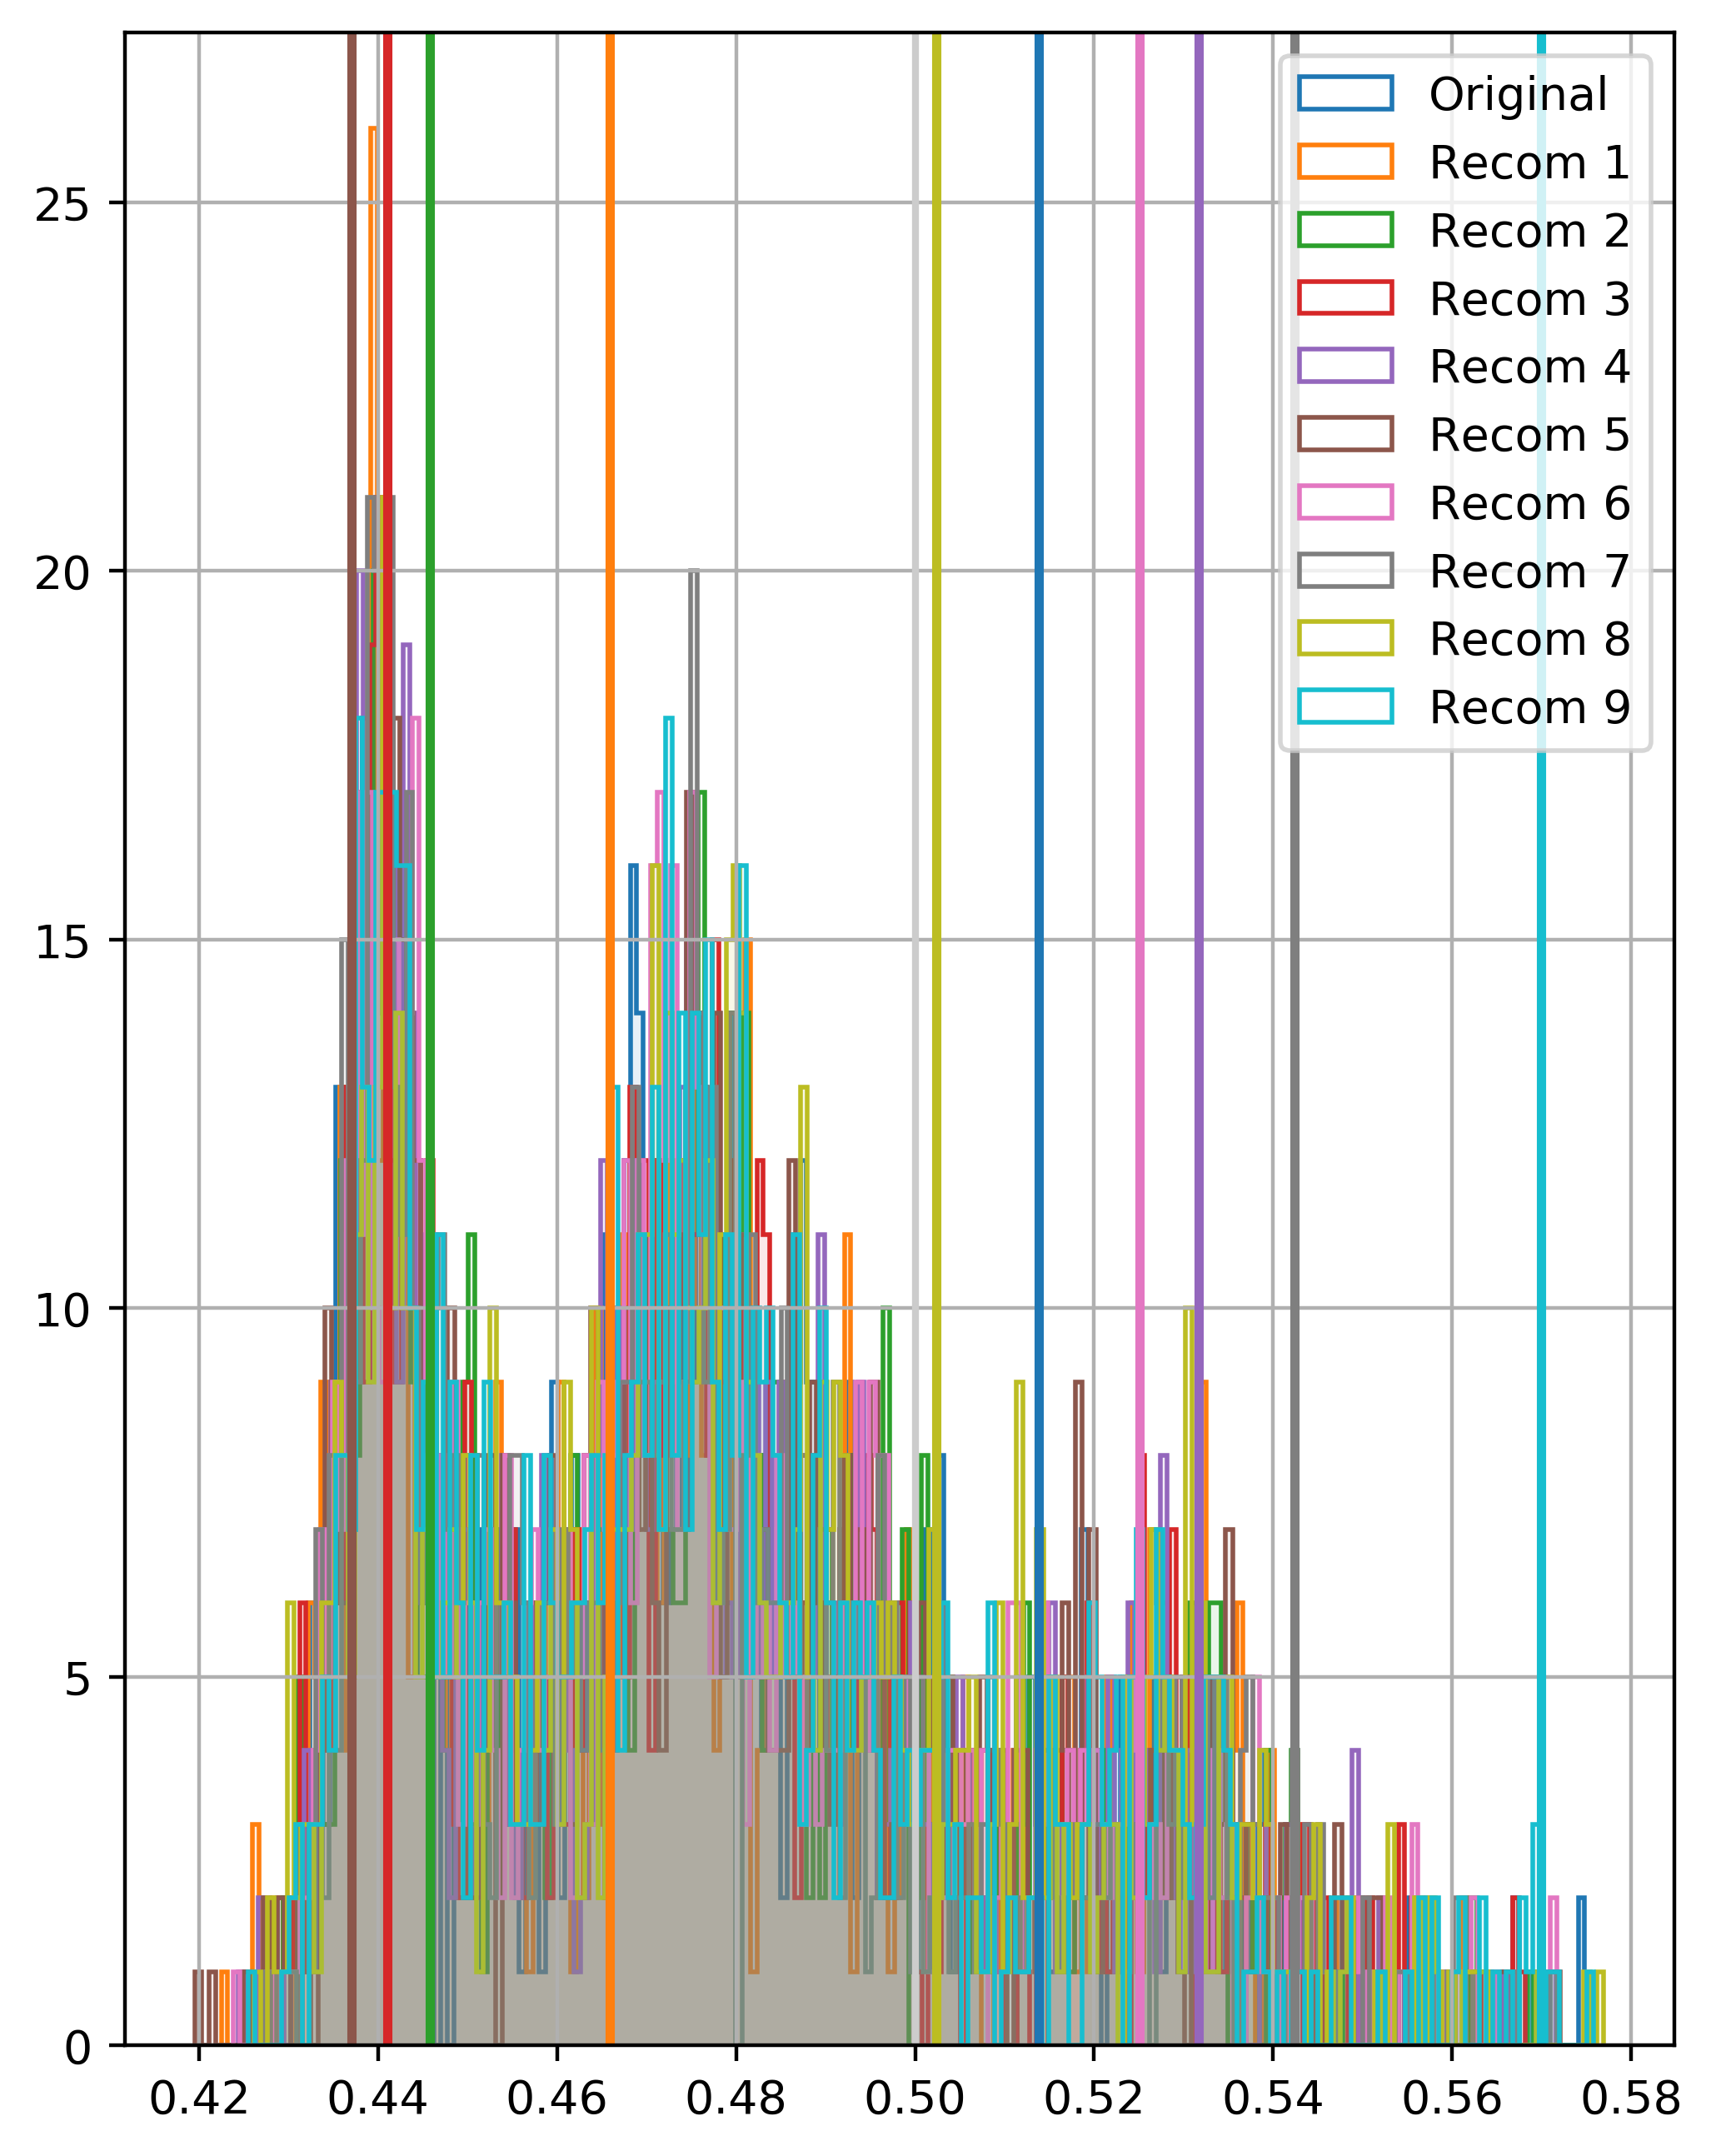

<Figure size 432x288 with 0 Axes>

In [11]:
key = 'Sorted SenRep Vote Share 1'
make_10step_histogram(data, LRVS_col=key)

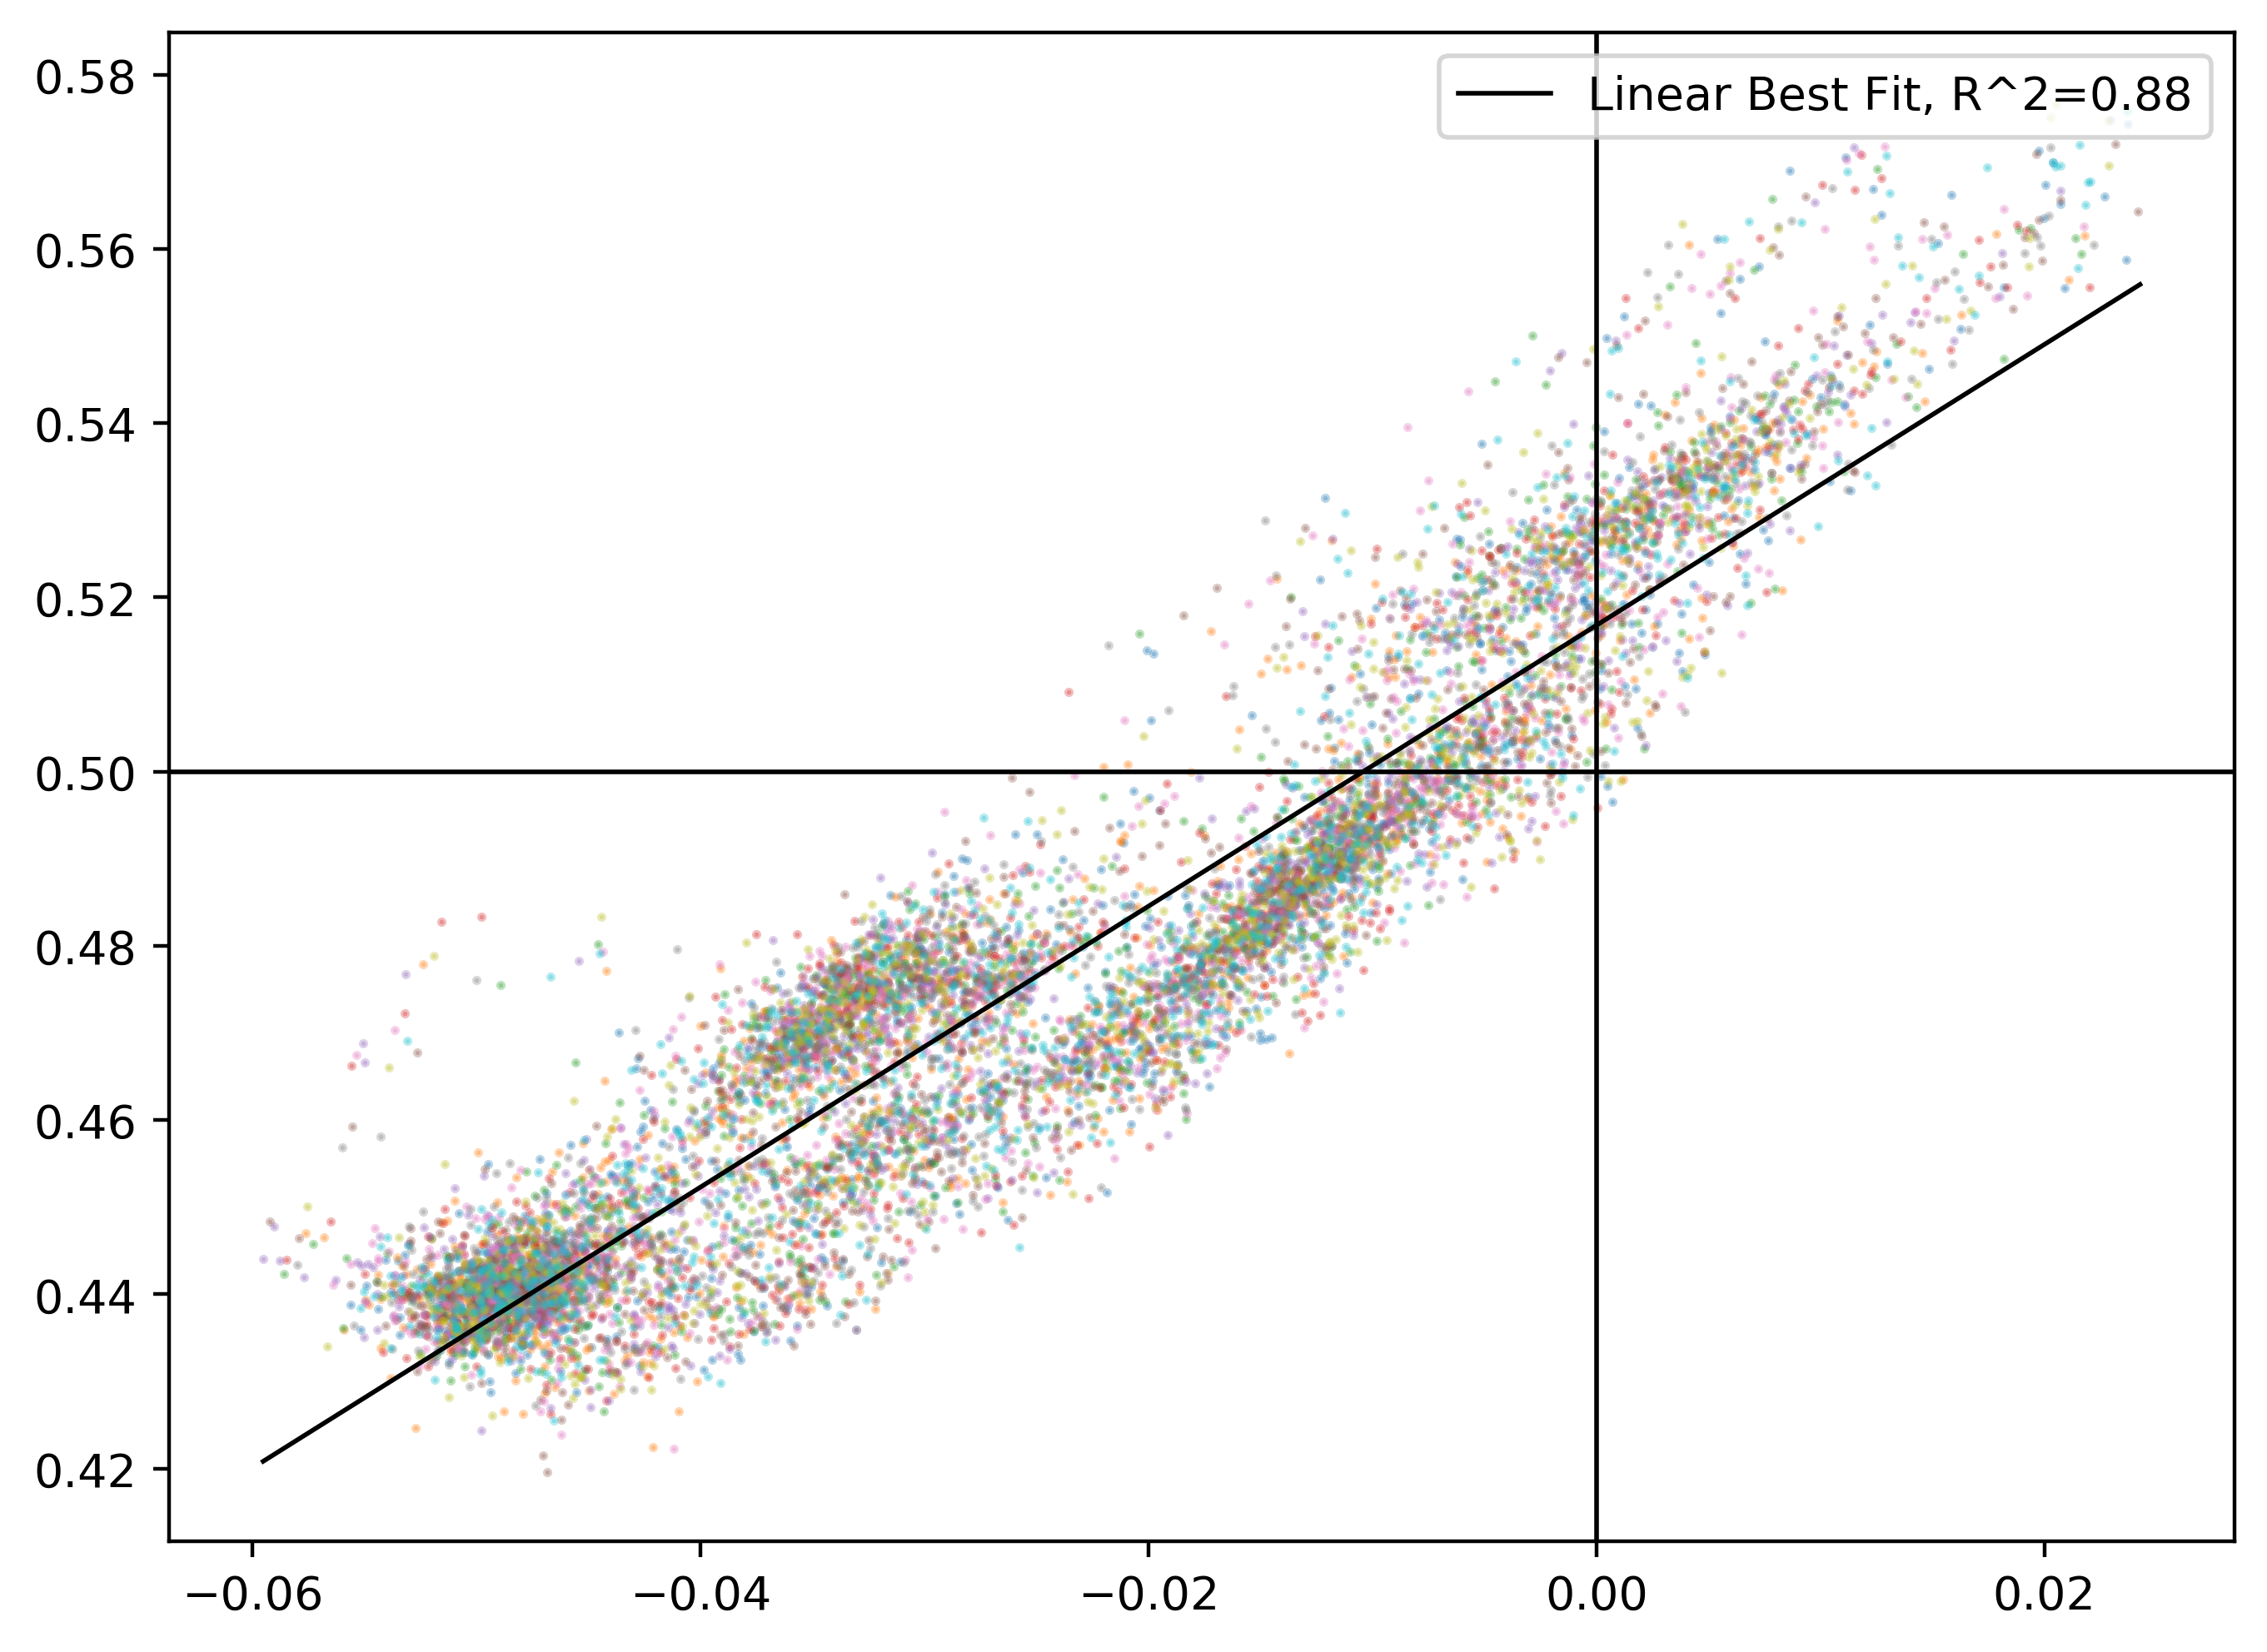

<Figure size 432x288 with 0 Axes>

In [12]:
key = 'Avg Abs Partisan Dislocation - SEN'
key = 'Mean Median - SEN'
LRVS_col = 'Sorted SenRep Vote Share 1'
make_scatter_correlation(data, key, LRVS_col, ten_recom=True)

No handles with labels found to put in legend.


[-0.25  0.  ]
0.05


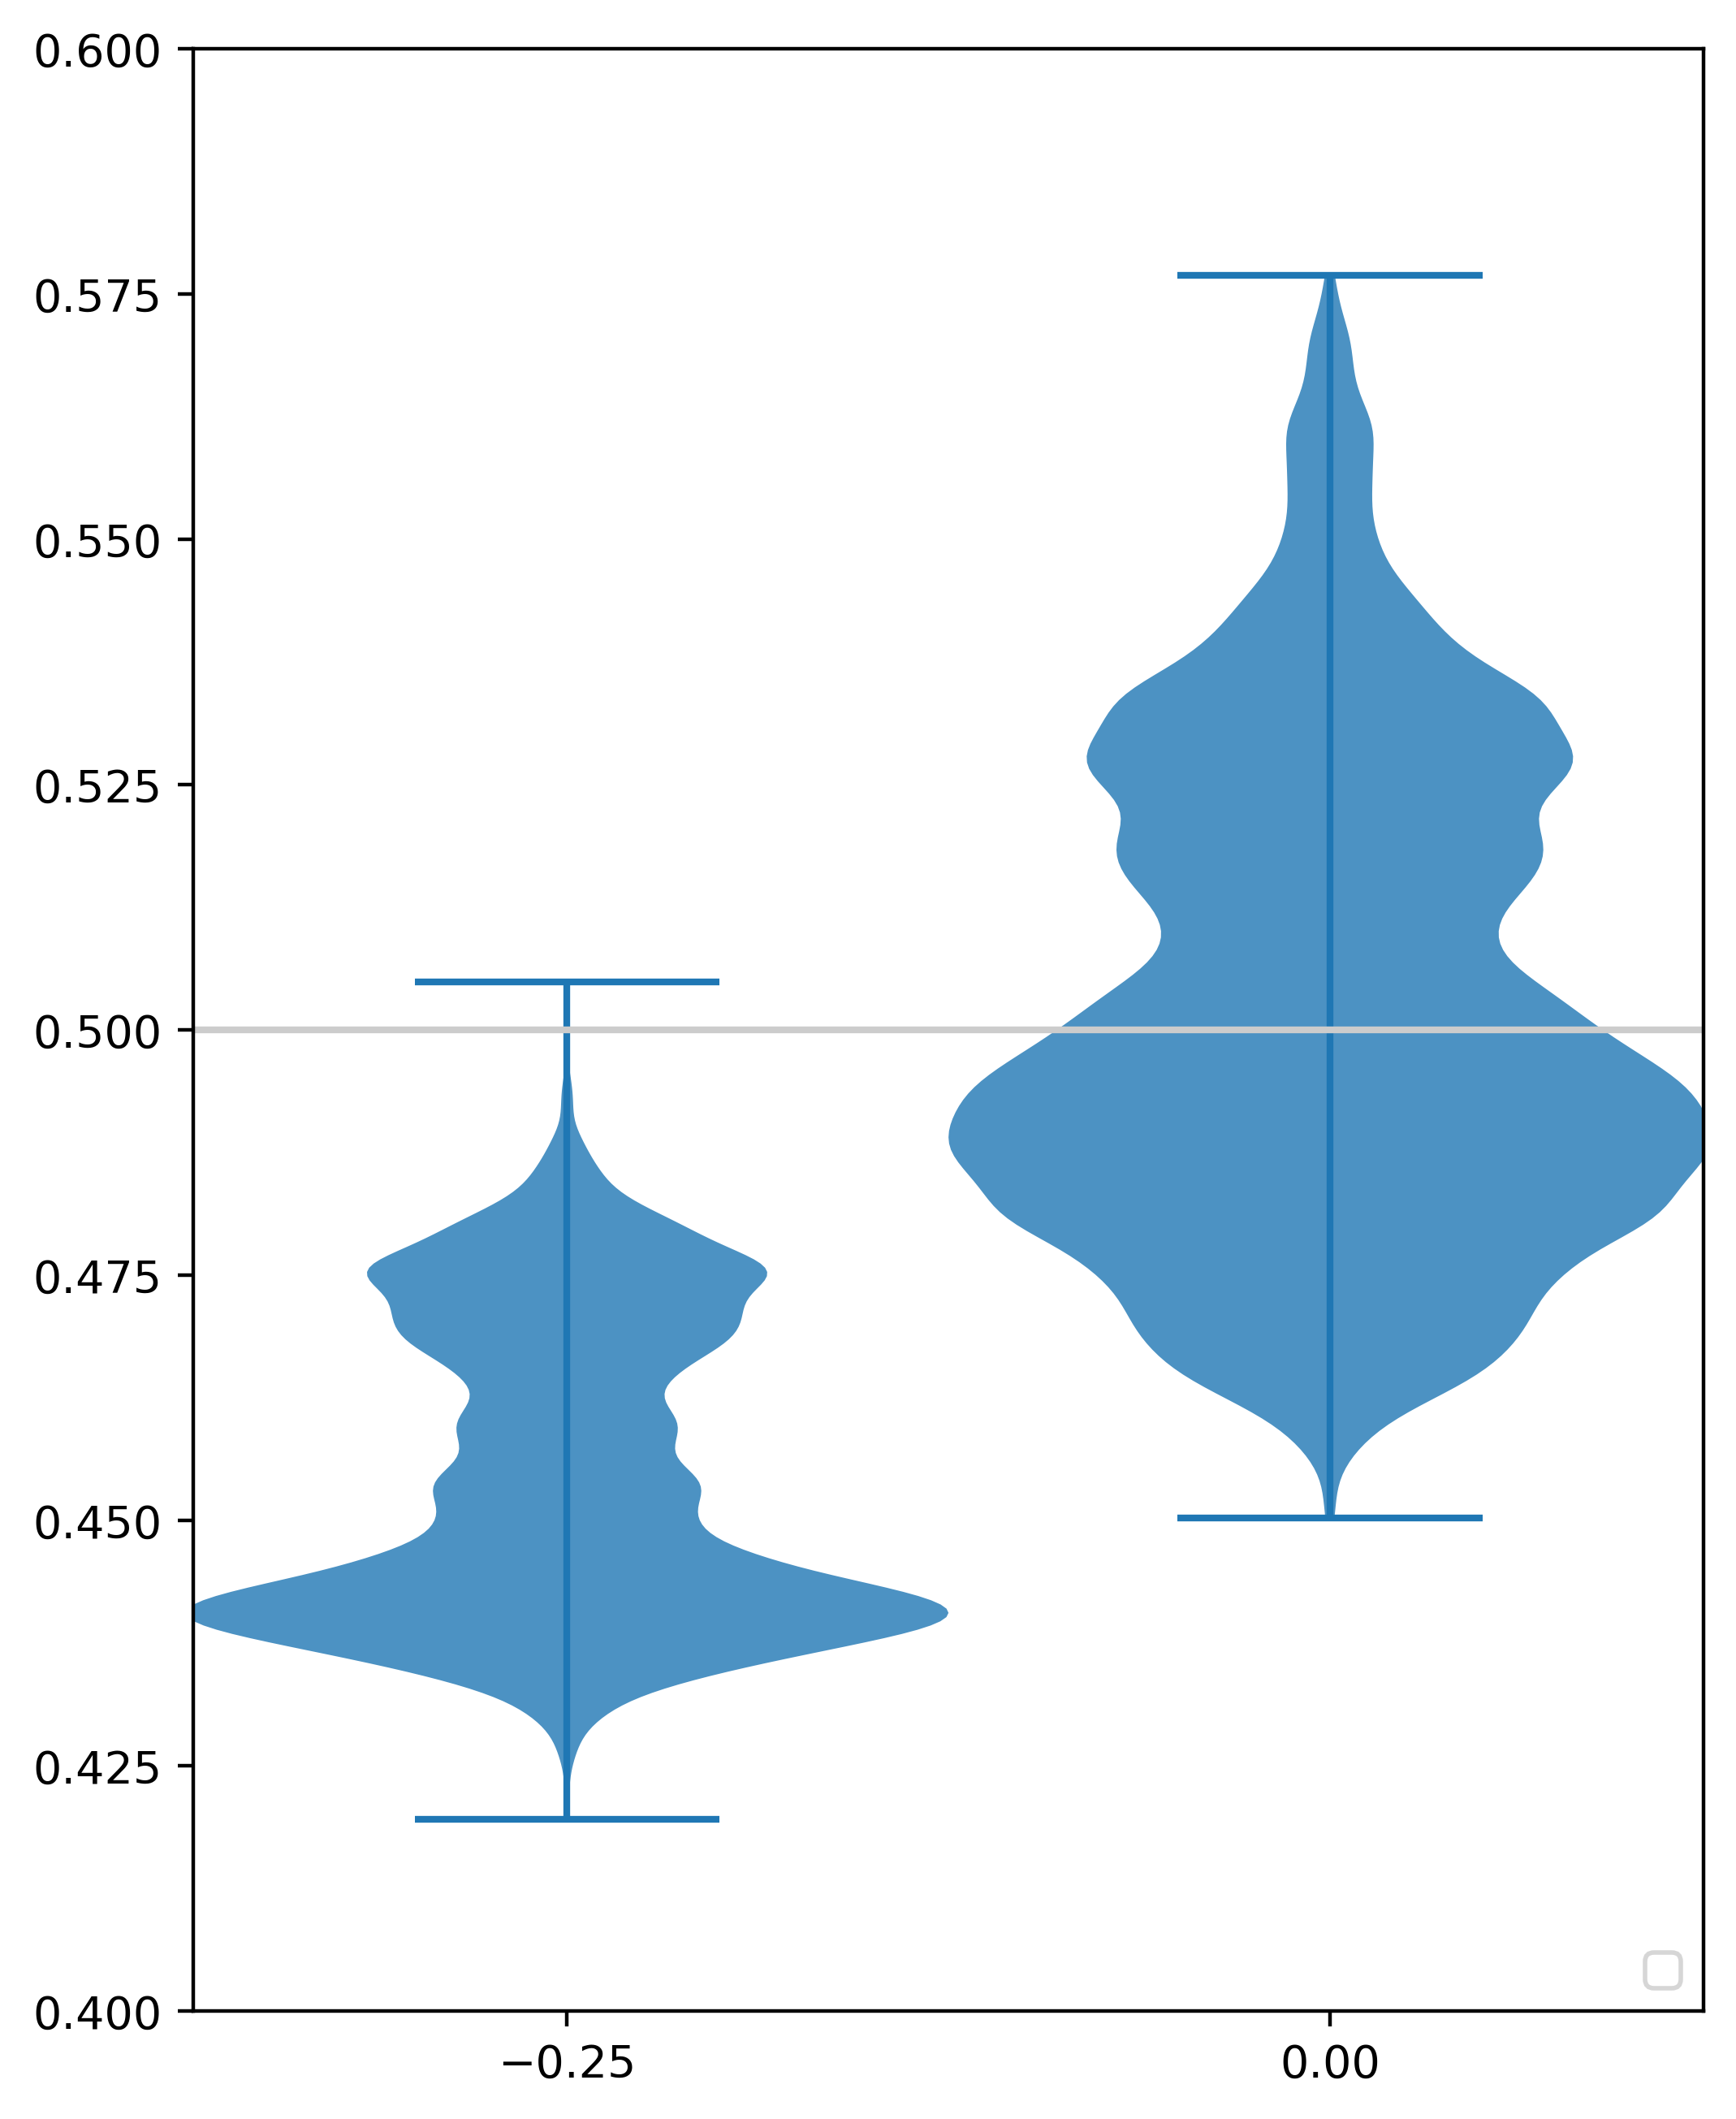

<Figure size 432x288 with 0 Axes>

In [13]:
%run plotting.py
key = 'Partisan Bias - SEN'
LRVS_col = 'Sorted SenRep Vote Share 1'
s = make_violin_correlation(data, key, LRVS_col)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Jacob\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-72da4e179e64>", line 1, in <module>
    plt.violinplot(s, positions=[-0.25, 0], widths=0.1)
  File "C:\Users\Jacob\Anaconda3\lib\site-packages\matplotlib\pyplot.py", line 3028, in violinplot
    **({"data": data} if data is not None else {}))
  File "C:\Users\Jacob\Anaconda3\lib\site-packages\matplotlib\__init__.py", line 1599, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "C:\Users\Jacob\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py", line 8054, in violinplot
    vpstats = cbook.violin_stats(dataset, _kde_method, points=points)
  File "C:\Users\Jacob\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 1517, in violin_stats
    coords = np.linspace(min_val, max_val, points)
  File "<__array_function__ internals>", li

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

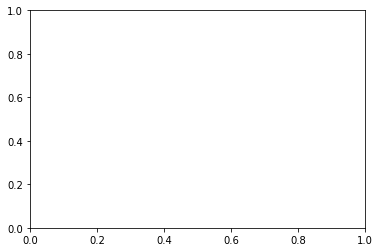

In [14]:
plt.violinplot(s, positions=[-0.25, 0], widths=0.1)

In [ ]:
eg = np.array(data.iloc[:, 9:12])
mask = eg < 0
eg[mask] = np.mean(eg[mask], axis=0)
eg[~mask] = np.mean(eg[~mask], axis=0)
data.iloc[:, 9:12] = eg


In [ ]:
np.unique(data.iloc[:, 9].values)

In [ ]:
data.iloc[:, 6:15] = -data.iloc[:, 6:15]

In [ ]:
run making_plots.py

In [ ]:
make_all_plots(data, 'WeightedB', 'full_page', 'TestPlots/')